In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data

In [2]:
train_data=pd.read_csv('H:\\analytics_vidhya\\data_quest\\train_data.csv')
test_data=pd.read_csv('H:\\analytics_vidhya\\data_quest\\test_TQDFDgg.csv')
train_data.tail()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
11772,VIC20120001118366,23:15:02,13-06-2012,Sanjay Colony--Patel Nagar,Raipur,Multiple Vehicular Incident,4,3,CUR,HIW,HIL,0
11773,VIC20110000320257,00:15:02,03-03-2011,Shartradhar Crosing,Raipur,2 Wheeler accidents,1,2,CUR,HIW,AGL,0
11774,VIC20090001341524,20:52:35,18-07-2009,Ramsawala,Sahaspur,2 Wheeler accidents,25,22,INT,HIW,HOSP,0
11775,VIC20140000744614,06:51:15,23-06-2014,Majri Grant,Doiwala,Multiple Vehicular Incident,8,8,UNK,LOC,AGL,1
11776,VIC20100000952321,16:51:39,09-05-2010,Shimla Chowk,Raipur,Vehicle role over/Skid,8,3,INT,HIW,MAR,0


In [3]:
print("shape of train data:"+str(train_data.shape))
print("shape of test data:"+str(test_data.shape))

shape of train data:(11777, 12)
shape of test data:(5048, 11)


In [4]:
train_data.isnull().sum()

victim_id                       0
incident_time                   0
incident_date                   0
incident_location             307
incident_tehsil                 0
cause_of_emergency              0
base_to_scene_distance          0
scene_to_hospital_distance      0
roadway_feature                 0
road_type                       0
surrounding_area                0
criticality                     0
dtype: int64

In [5]:
train_data.dtypes

victim_id                     object
incident_time                 object
incident_date                 object
incident_location             object
incident_tehsil               object
cause_of_emergency            object
base_to_scene_distance         int64
scene_to_hospital_distance     int64
roadway_feature               object
road_type                     object
surrounding_area              object
criticality                    int64
dtype: object

In [6]:
categorical_variables=train_data.dtypes[train_data.dtypes=='object'].index.values

In [7]:
train_data[categorical_variables].apply(lambda x: len(x.unique()))

victim_id             11777
incident_time         10752
incident_date          2107
incident_location      5522
incident_tehsil           7
cause_of_emergency       14
roadway_feature           5
road_type                 2
surrounding_area          6
dtype: int64

In [8]:
test_data[categorical_variables].apply(lambda x: len(x.unique()))

victim_id             5048
incident_time         4855
incident_date         1916
incident_location     2760
incident_tehsil          7
cause_of_emergency      14
roadway_feature          5
road_type                2
surrounding_area         6
dtype: int64

In [9]:
#mean criticality of train_data
train_data['criticality'].mean()

0.04432368175256857

In [10]:
train_data[train_data['criticality']==1].apply(lambda x: len(x.unique()))

victim_id                     522
incident_time                 521
incident_date                 427
incident_location             410
incident_tehsil                 7
cause_of_emergency             11
base_to_scene_distance         42
scene_to_hospital_distance     62
roadway_feature                 5
road_type                       2
surrounding_area                6
criticality                     1
dtype: int64

In [11]:
d=train_data['incident_date']+' '+train_data['incident_time']
d1=test_data['incident_date']+' '+test_data['incident_time']
d=pd.to_datetime(d)
d1=pd.to_datetime(d1)

In [12]:
del train_data['incident_date']
del train_data['incident_time']
del test_data['incident_date']
del test_data['incident_time']
train_data['datetime']=d
test_data['datetime']=d1

In [13]:
train_data.tail()

,victim_id,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,datetime
11772,VIC20120001118366,Sanjay Colony--Patel Nagar,Raipur,Multiple Vehicular Incident,4,3,CUR,HIW,HIL,0,2012-06-13 23:15:02
11773,VIC20110000320257,Shartradhar Crosing,Raipur,2 Wheeler accidents,1,2,CUR,HIW,AGL,0,2011-03-03 00:15:02
11774,VIC20090001341524,Ramsawala,Sahaspur,2 Wheeler accidents,25,22,INT,HIW,HOSP,0,2009-07-18 20:52:35
11775,VIC20140000744614,Majri Grant,Doiwala,Multiple Vehicular Incident,8,8,UNK,LOC,AGL,1,2014-06-23 06:51:15
11776,VIC20100000952321,Shimla Chowk,Raipur,Vehicle role over/Skid,8,3,INT,HIW,MAR,0,2010-09-05 16:51:39


In [14]:
train_data['hour_of_accident']=train_data['datetime'].dt.hour
test_data['hour_of_accident']=test_data['datetime'].dt.hour

In [15]:
train_data['weekday']=train_data['datetime'].dt.dayofweek
test_data['weekday']=test_data['datetime'].dt.dayofweek

In [16]:
del train_data['incident_location']
del test_data['incident_location']

### Encoding of categorical variables

In [17]:
train_data.columns

Index([u'victim_id', u'incident_tehsil', u'cause_of_emergency',
       u'base_to_scene_distance', u'scene_to_hospital_distance',
       u'roadway_feature', u'road_type', u'surrounding_area', u'criticality',
       u'datetime', u'hour_of_accident', u'weekday'],
      dtype='object')

In [18]:
categorical_variables=[x for x in train_data.columns if train_data[x].dtypes=='O' and x not in ['victim_id','datetime']]

In [19]:
categorical_variables

['incident_tehsil',
 'cause_of_emergency',
 'roadway_feature',
 'road_type',
 'surrounding_area']

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [22]:
encoded_train_data=pd.DataFrame(data=train_data,copy=True)

In [23]:
encoded_test_data=pd.DataFrame(data=test_data,copy=True)

In [24]:
encoded_train_data[categorical_variables] =encoded_train_data[categorical_variables].apply(lambda x: d[x.name].fit_transform(x))
encoded_test_data[categorical_variables] =encoded_test_data[categorical_variables].apply(lambda x: d[x.name].transform(x))

In [25]:
encoded_train_data.tail()

,victim_id,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality,datetime,hour_of_accident,weekday
11772,VIC20120001118366,4,9,4,3,0,0,3,0,2012-06-13 23:15:02,23,2
11773,VIC20110000320257,4,0,1,2,0,0,0,0,2011-03-03 00:15:02,0,3
11774,VIC20090001341524,5,0,25,22,1,0,4,0,2009-07-18 20:52:35,20,5
11775,VIC20140000744614,2,9,8,8,4,1,0,1,2014-06-23 06:51:15,6,0
11776,VIC20100000952321,4,13,8,3,1,0,5,0,2010-09-05 16:51:39,16,6


In [26]:
independent_variables=[x for x in train_data.columns if x not in ['victim_id','datetime','criticality']]

## Model fitting

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(encoded_train_data[independent_variables], encoded_train_data['criticality'], test_size=0.33, random_state = 0)

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
def scorer(estimator,X,y):
    y1=np.array(estimator.predict(X))
    score=roc_auc_score(y,y1)
    return score

### RandomForest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
depths=[3,5,7,9]
n_estimators=[10,20,30,40]
temp_score=0

In [34]:
for depth in depths:
    for n in n_estimators:
        rfm=RandomForestClassifier(max_depth=depth,n_estimators=n,random_state=0)
        a=cross_val_score(rfm,X_train,y_train,scoring=scorer,cv=5).mean()
        if a>temp_score:
            temp_score=a
            depth_1=depth
            n_1=n
            
print('maximum score obtained is '+str(temp_score)+'.It is obtained at n_estmators='+str(n_1)+' and max_depth='+str(depth_1))

maximum score obtained is 0.508271532564.It is obtained at n_estmators=10 and max_depth=7


In [35]:
rfm=RandomForestClassifier(max_depth=7,n_estimators=10,random_state=0)
cross_val_score(rfm,X_train,y_train,scoring=scorer,cv=5)

array([ 0.50702203,  0.50669113,  0.5137125 ,  0.50746269,  0.50646931])

In [36]:
rfm.fit(X_train,y_train)
scorer(rfm,X_test,y_test)

0.50231231433972456

### Adaptive boosting

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
learning_rates=[0.01,0.1,1,2,5,10]
n_estimators=[50,100,150]
temp_score=0
scores=[]
for n in n_estimators:
    for lr in learning_rates:
        adam=AdaBoostClassifier(learning_rate=lr,n_estimators=n,random_state=0)
        score=(float('%0.5f'%(cross_val_score(adam,X_train,y_train,scoring=scorer,cv=5).mean())))
        scores.append(score)
        if score>temp_score:
            temp_score=score
            lr_1=lr
            n_1=n
    
print("Maximum score(accuracy) obtained is:"+str(temp_score))
print("It is obtained at learning rate="+str(lr_1)+" and n_estimators="+str(n_1))

Maximum score(accuracy) obtained is:0.68138
It is obtained at learning rate=2 and n_estimators=50


In [47]:
cross_val_score?


In [39]:
learning_rates=[1,2,3,5,10]
n_estimators=[48,50,52]
temp_score=0
scores=[]
for n in n_estimators:
    for lr in learning_rates:
        adam=AdaBoostClassifier(learning_rate=lr,n_estimators=n,random_state=0)
        score=(float('%0.5f'%(cross_val_score(adam,X_train,y_train,scoring=scorer,cv=5).mean())))
        scores.append(score)
        if score>temp_score:
            temp_score=score
            lr_1=lr
            n_1=n
    
print("Maximum score(accuracy) obtained is:"+str(temp_score))
print("It is obtained at learning rate="+str(lr_1)+" and n_estimators="+str(n_1))

Maximum score(accuracy) obtained is:0.68138
It is obtained at learning rate=2 and n_estimators=48


In [40]:
learning_rates=[1.5,2,2.2,2.4,2.8]
n_estimators=[47,48,50]
temp_score=0
scores=[]
for n in n_estimators:
    for lr in learning_rates:
        adam=AdaBoostClassifier(learning_rate=lr,n_estimators=n,random_state=0)
        score=(float('%0.5f'%(cross_val_score(adam,X_train,y_train,scoring=scorer,cv=5).mean())))
        scores.append(score)
        if score>temp_score:
            temp_score=score
            lr_1=lr
            n_1=n
    
print("Maximum score(accuracy) obtained is:"+str(temp_score))
print("It is obtained at learning rate="+str(lr_1)+" and n_estimators="+str(n_1))

Maximum score(accuracy) obtained is:0.68138
It is obtained at learning rate=2 and n_estimators=48


In [41]:
adam=AdaBoostClassifier(learning_rate=2,n_estimators=48,random_state=0)
adam.fit(X_train,y_train)
scorer(adam,X_test,y_test)

0.66069740750742634

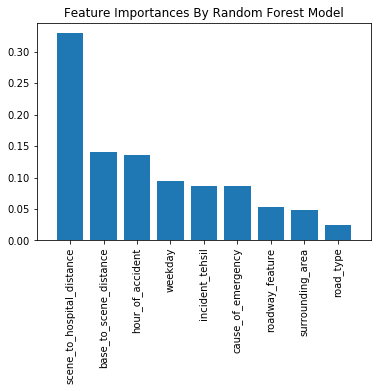

In [42]:
#feature importances using random forest model
importances=rfm.feature_importances_
std = np.std([rfm.feature_importances_ for tree in rfm.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
predictors=X_train.columns
for i in indices:
    sorted_important_features.append(predictors[i])

plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
        yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)]);

### Predictions for test data

In [43]:
adam.fit(encoded_train_data[independent_variables],encoded_train_data['criticality'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=2,
          n_estimators=48, random_state=0)

In [44]:
test_predictions=adam.predict(encoded_test_data[independent_variables])

In [45]:
victim_id=test_data['victim_id']

In [46]:
submission=pd.DataFrame({
    'victim_id':victim_id,
    'criticality': test_predictions
})
submission.to_csv('dataquest_submission1.csv', index=False)